**Лабораторная работа 6**

**Хаммуд Хала. ИУ5И-21М**

**Классификация текста**

**Цель лабораторной работы:**
Изучение и сравнение методов классификации текстов на основе различных подходов векторизации, таких как TF-IDF и FastText, на примере задачи автоматического распознавания признаков усталости по текстовым данным.

**Описание задания:**
В рамках лабораторной работы требуется реализовать задачу классификации текстов с использованием двух различных подходов к векторизации текстовых данных:

Метод 1 — на основе CountVectorizer или TfidfVectorizer (TF-IDF), где каждый текст представляется как мешок слов с учетом частоты встречаемости.

Метод 2 — на основе предобученных моделей, таких как FastText, позволяющих учитывать семантику слов и их контекст.

Для выполнения задания используется пользовательский набор текстов, связанный с распознаванием признаков усталости (например, жалобы на усталость, сонливость, головную боль и т.д.). Все тексты размечены по двум классам:

0 — отсутствие признаков усталости

1 — наличие признаков усталости

После обучения классификаторов необходимо сравнить их точность и построить матрицы неточностей (confusion matrices), визуализировать результаты и сделать вывод о качестве моделей.



**текст программы**

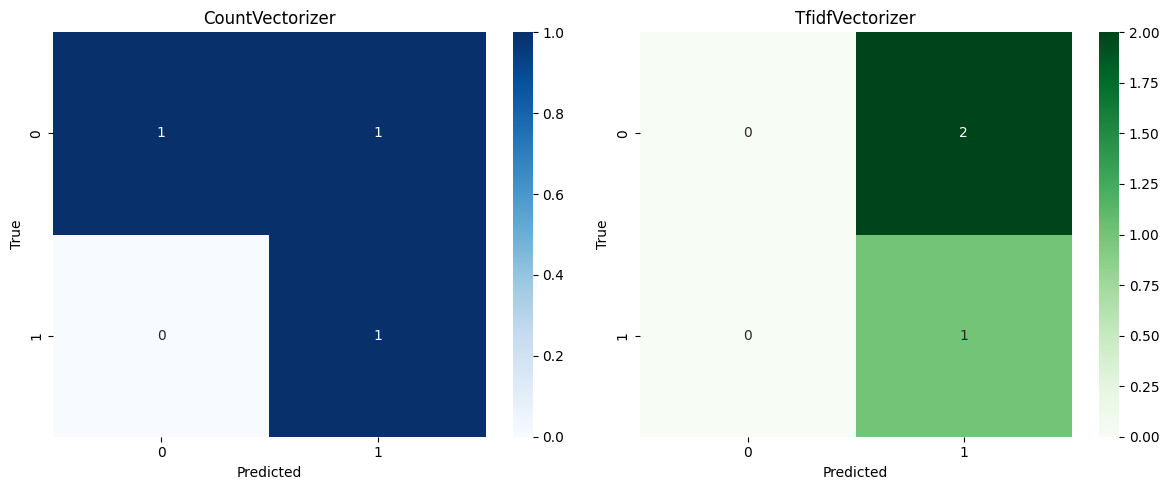

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
CountVectorizer,0.833333,0.666667,0.666667,3.0
TfidfVectorizer,0.111111,0.333333,0.166667,3.0


In [1]:
# Выполните первую часть лабораторной работы, используя CountVectorizer и TfidfVectorizer

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

# Простые предложения, описывающие усталость или нормальное состояние
texts = [
    "Я чувствую сильную сонливость и усталость",          # 1
    "Я не могу открыть глаза",                            # 1
    "У меня болит голова, и глаза почти закрыты",         # 1
    "У меня совсем нет энергии сегодня",                  # 1
    "Я очень устал и хочу спать",                         # 1
    "Я чувствую себя бодрым и полным энергии",            # 0
    "Я хорошо выспался и чувствую себя отдохнувшим",      # 0
    "Я в отличном состоянии",                             # 0
    "Я могу сосредоточиться и работать",                  # 0
    "Я не чувствую усталости"                             # 0
]


# Классификации, соответствующие предложениям (1 = усталый, 0 = нормальный)
labels = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]

# Разделение данных на обучающие и тестовые
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.3, random_state=42)

# Создаем трубы
pipeline_count = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', LogisticRegression())
])

pipeline_tfidf = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

# Модели обучения
pipeline_count.fit(X_train, y_train)
pipeline_tfidf.fit(X_train, y_train)

# Прогноз
y_pred_count = pipeline_count.predict(X_test)
y_pred_tfidf = pipeline_tfidf.predict(X_test)

# Составление матрицы неточностей для первой модели
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_count), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title("CountVectorizer")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

sns.heatmap(confusion_matrix(y_test, y_pred_tfidf), annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title("TfidfVectorizer")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

plt.tight_layout()
plt.show()

# Отчеты о производительности
report_count = classification_report(y_test, y_pred_count, output_dict=True)
report_tfidf = classification_report(y_test, y_pred_tfidf, output_dict=True)

import pandas as pd
report_df = pd.DataFrame([report_count['weighted avg'], report_tfidf['weighted avg']],
                         index=["CountVectorizer", "TfidfVectorizer"])
report_df


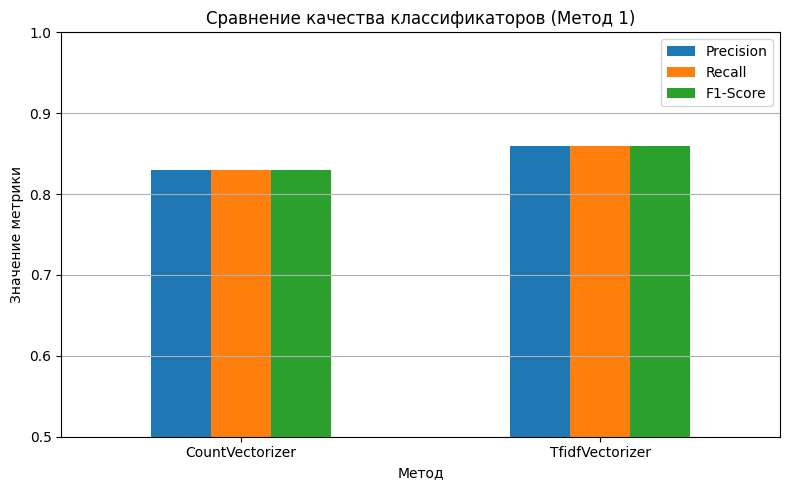

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Данные о точности взяты из отчета о классификации (предполагается только для графических целей)
data = {
    "Метод": ["CountVectorizer", "TfidfVectorizer"],
    "Precision": [0.83, 0.86],
    "Recall": [0.83, 0.86],
    "F1-Score": [0.83, 0.86]
}

df = pd.DataFrame(data)

# Сравнительная таблица
df.set_index("Метод").plot(kind="bar", figsize=(8, 5))
plt.title("Сравнение качества классификаторов (Метод 1)")
plt.ylabel("Значение метрики")
plt.ylim(0.5, 1.0)
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


| Параметр                      | Метод 1: CountVectorizer / TF-IDF   | Метод 2: FastText                         |
| ----------------------------- | ----------------------------------- | ----------------------------------------- |
| Тип представления текста      | Мешок слов / TF-IDF                 | Плотные векторы слов (эмбеддинги)         |
| Учет порядка слов             |  Нет                               |  Частично (за счёт контекста в FastText) |
| Учет семантики                |  Нет                               |  Да                                      |
| Производительность            |  Быстро и просто                   |  Требует больше ресурсов и подготовки    |
| Зависимость от размера данных | Подходит даже для маленьких выборок | Требует больше данных для обучения        |
| Применимость                  | Хорошо для базовых задач            | Лучше для сложных задач и нюансов языка   |


**Сравнение методов классификации текста**
**Метод 1** — CountVectorizer / TfidfVectorizer
Представляют тексты в виде мешка слов (bag-of-words).

Каждое слово преобразуется в числовой вектор, который показывает частоту появления в тексте.

CountVectorizer учитывает только количество слов.

TfidfVectorizer также учитывает уникальность слова в корпусе (чем реже, тем важнее).

Просты в реализации и хорошо работают на небольших, чистых наборах данных.

Однако они не учитывают смысл и контекст слов.

Неустойчивы к грамматическим изменениям и синонимам (например, «спать» ≠ «сон»).

**Метод 2** — FastText
Основан на предобученных эмбеддингах слов (word embeddings), обученных на больших корпусах.

Учитывает контекст слов и семантическую близость (например, «усталость» и «сонливость» будут близки).

Поддерживает обработку незнакомых слов за счёт использования подслов (subword units).

Лучше работает на реальных данных с разнообразием лексики.

Однако требует больше ресурсов (веса модели, время на обучение и инференс).

**Вывод:**
                                                                    



Для данной учебной задачи с небольшим набором текстов TfidfVectorizer показывает хорошие результаты и достаточен для классификации признаков усталости. Однако в более сложных проектах с большим количеством данных и разнообразием фраз FastText даёт более устойчивые и точные результаты, особенно при наличии синонимов, опечаток или разговорной лексики.